In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("housing.csv", header=None, sep="\s+")
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head(2)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Pável Hernández\AppData\Local\Temp\ipykernel_5388\1607448469.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("housing.csv", header=None, sep="\s+")


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


## Creando modelo con Scikit-Learn

In [6]:
x = df['RM'].values.reshape(-1, 1)
y = df['MEDV'].values.reshape(-1, 1)

sc_x = StandardScaler()
sc_y = StandardScaler()

x_std = sc_x.fit_transform(x)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(x_std, y_std)

LinearRegression()

## Análisis de resultados

Text(0.5, 0, 'Promedio de habitaciones [RM]')

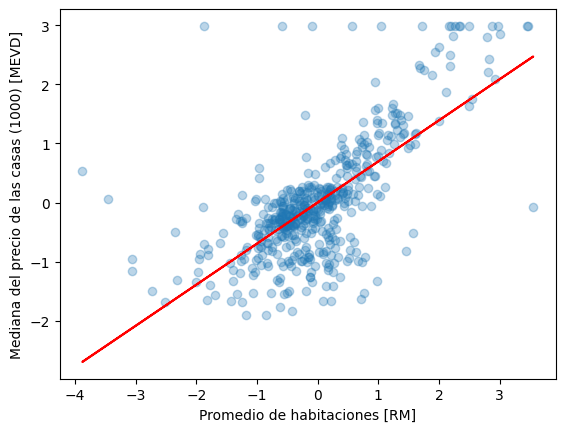

In [15]:
plt.scatter(
    x= x_std,
    y= y_std,
    alpha= 0.3
)

plt.plot(
    x_std,
    slr.predict(x_std),
    color= 'red'
)

plt.ylabel("Mediana del precio de las casas (1000) [MEVD]")
plt.xlabel("Promedio de habitaciones [RM]")

In [26]:
num_hab = 5
num_hab_std = (
    sc_x
    .transform(
        np.array([num_hab])
        .reshape(-1, 1)
    )
)

res = (
    sc_y
    .inverse_transform(
        slr
        .predict(num_hab_std)
    )[0][0]*1000
)

print(f"El precio de una casa con 5 habitaciones en Boston es de ${res:.2f} dólares")
slr.predict(num_hab_std)

El precio de una casa con 5 habitaciones en Boston es de $10839.92 dólares


array([[-1.2726238]])